# ***Magpantay Nino Jandel C.***

# ***BSCS-3B***

# ***MR. Benardino***

# ***MIDTERM ACTIVITY***

# ***Data Cleaning and Preparation***

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('googleplaystore.csv')
print(df)


                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Convert 'Reviews' column to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Size' column to numeric
df['Size'] = df['Size'].str.replace('M', 'M').str.replace('k', 'e+3').replace('Varies with device', pd.NA).astype(float, errors='ignore')

# Convert 'Installs' column to numeric
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').replace('Free', None).astype(float)

# Convert 'Price' column to numeric after removing '$' sign
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Print the cleaned dataset
print(df)

# Check the datatypes of the converted columns
print(df.dtypes)



App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9355                                      FR Calculator               FAMILY   
9356                                   Sya9a Mar

# ***Exploratory Data Analysis (EDA)***

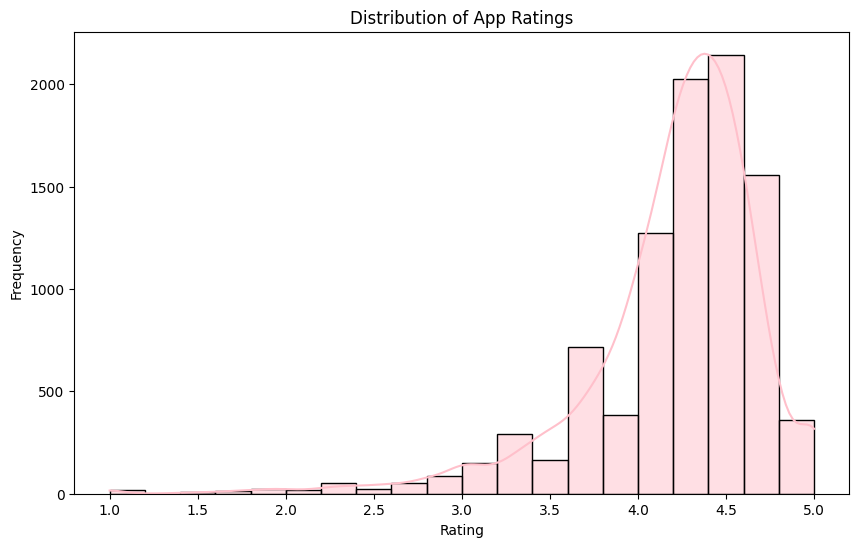

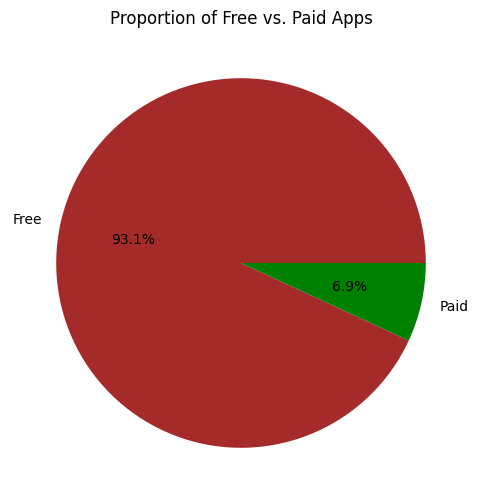

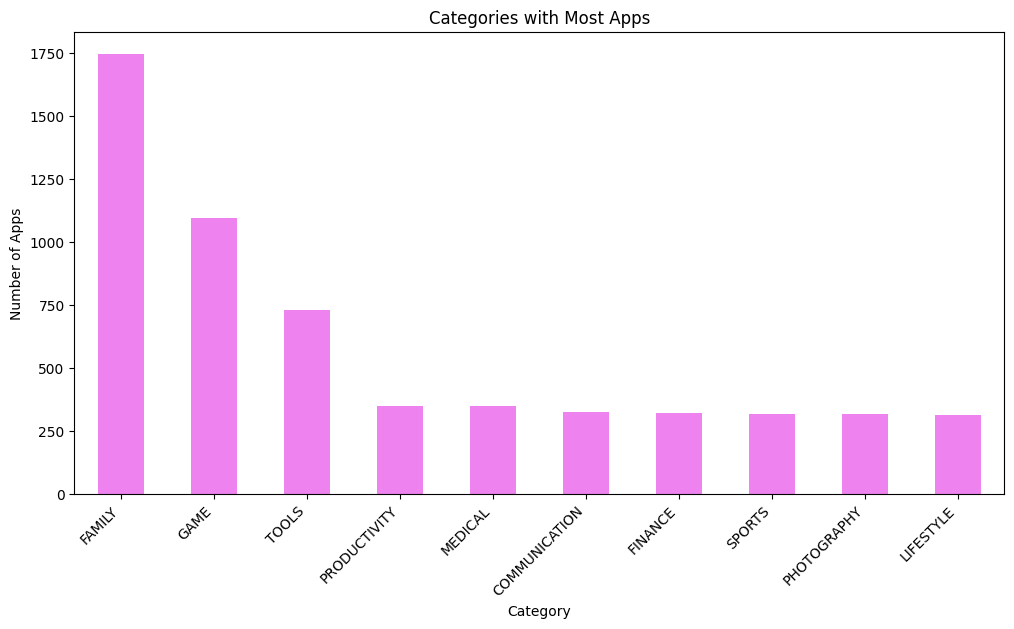

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='pink')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Proportion of Free vs. Paid Apps
plt.figure(figsize=(6, 6))
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['brown', 'green'])
plt.title('Proportion of Free vs. Paid Apps')
plt.ylabel('')
plt.show()

# Categories with Most Apps
plt.figure(figsize=(12, 6))
df['Category'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='violet')
plt.title('Categories with Most Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.show()

# ***Category Analysis***

Category with the highest average rating:
Category
EVENTS    4.435556
Name: Rating, dtype: float64

Category with the most reviews:
Category
GAME    1585419577
Name: Reviews, dtype: int64

Category with the most apps:
Category
FAMILY    1746
Name: count, dtype: int64


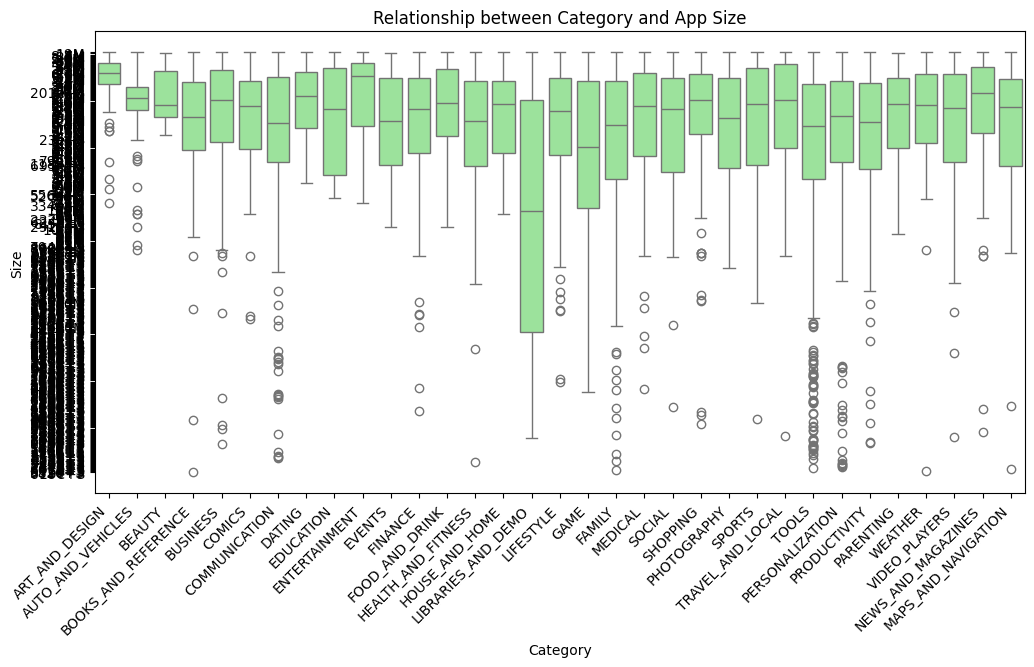

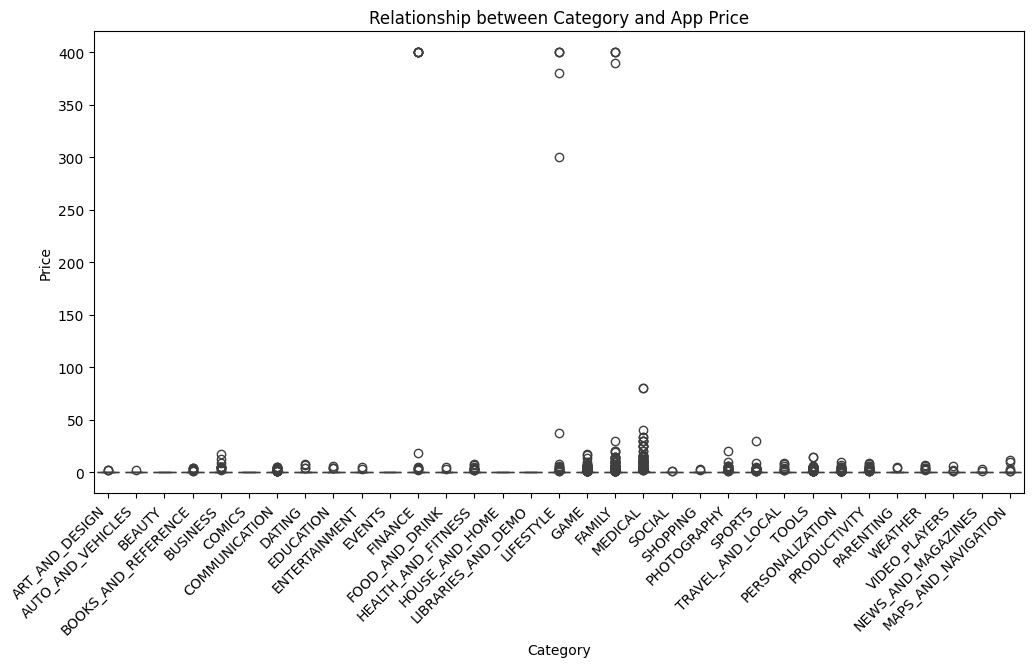

In [4]:
# Highest Average Rating by Category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Category with the highest average rating:")
print(avg_rating_by_category.head(1))

# Most Reviews by Category
most_reviews_by_category = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
print("\nCategory with the most reviews:")
print(most_reviews_by_category.head(1))

# Most Apps by Category
most_apps_by_category = df['Category'].value_counts().sort_values(ascending=False)
print("\nCategory with the most apps:")
print(most_apps_by_category.head(1))

# Relationship between Category and App Size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Size', data=df, color='lightgreen')
plt.title('Relationship between Category and App Size')
plt.xlabel('Category')
plt.ylabel('Size')
plt.xticks(rotation=45, ha='right')
plt.show()

# Relationship between Category and App Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Relationship between Category and App Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# ***Rating Prediction Model***

In [5]:
# Select relevant features
features = ['Reviews', 'Size', 'Installs', 'Price']

# Drop rows with missing values in selected features
df = df.dropna(subset=features)

# Convert 'Size' column to numeric
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Drop rows with non-numeric values in 'Size' column
df = df.dropna(subset=['Size'])

# Split data into features and target variable
X = df[features]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

<ipython-input-5-f21f8612e3fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = pd.to_numeric(df['Size'], errors='coerce')


Mean Squared Error: 0.3035791346153849
R-squared: -0.2812805032231893


# ***Trend Analysis***

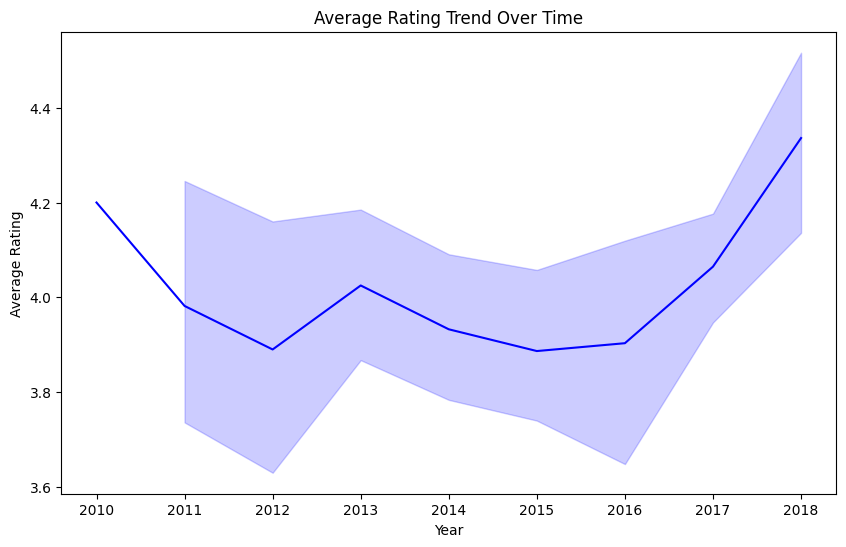

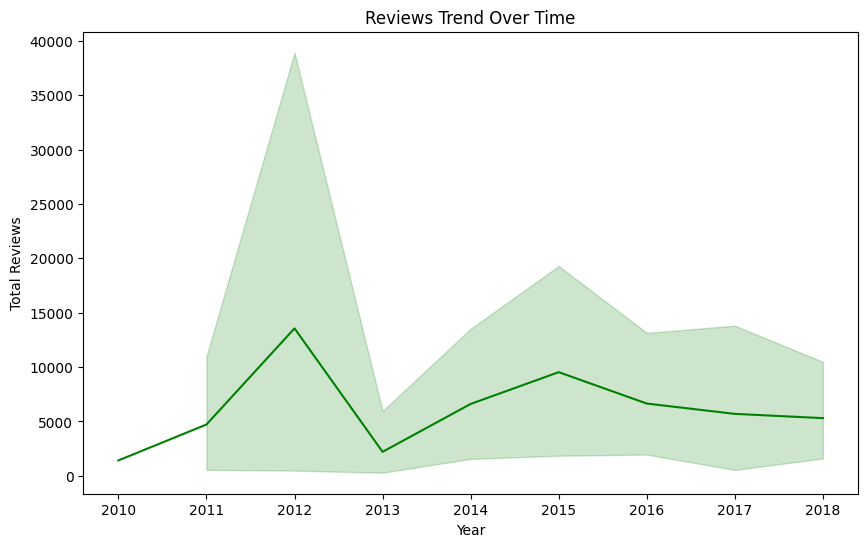

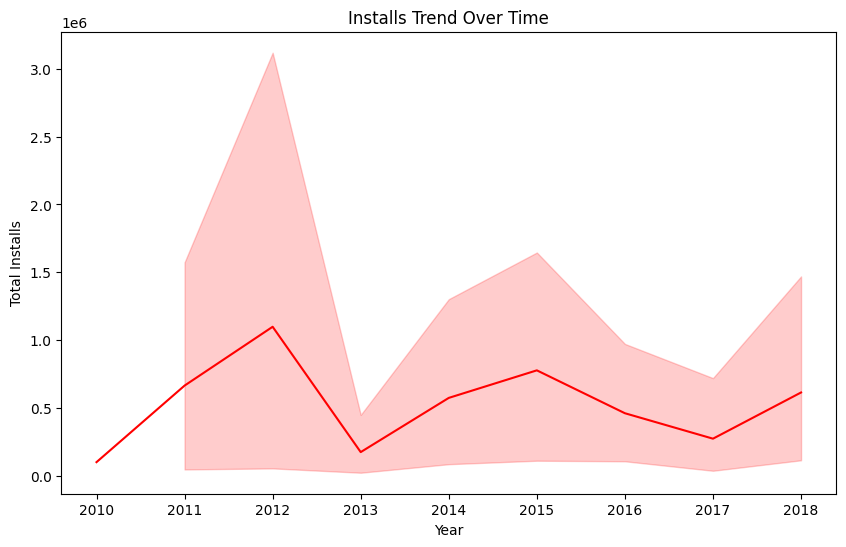

<ipython-input-6-492740dd6fd1>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Android Ver', y='Rating', data=df, palette="Set2")


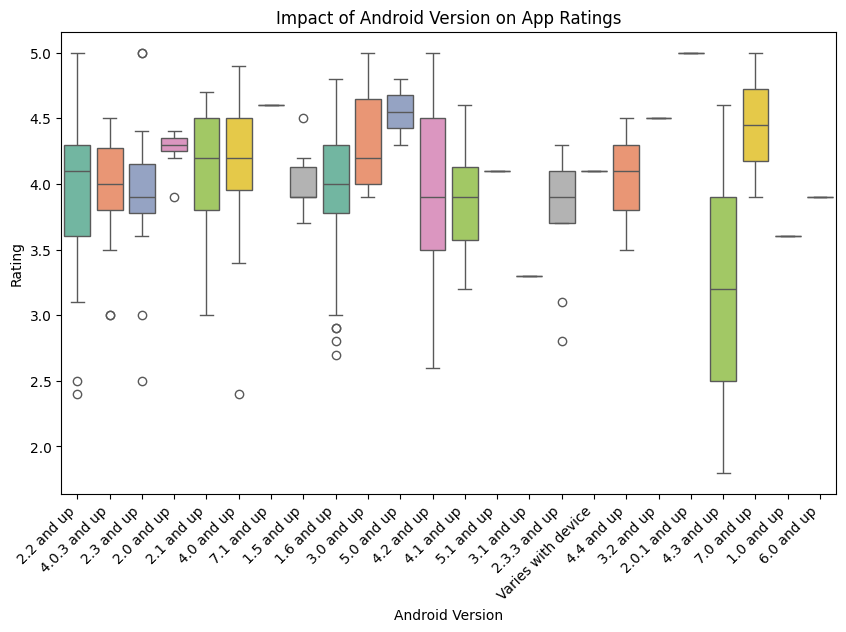

<ipython-input-6-492740dd6fd1>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Android Ver', y='Installs', data=df, palette="Set2")


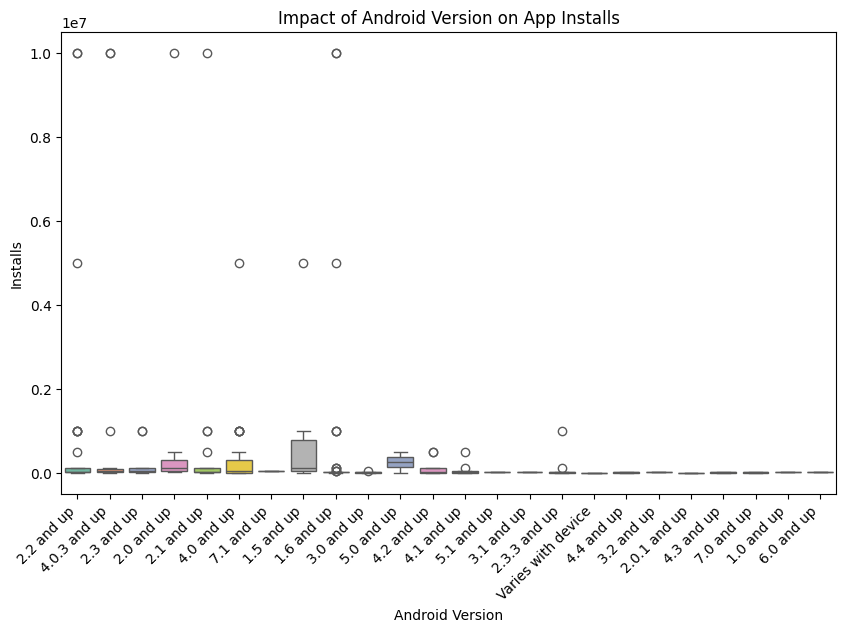

In [6]:
df['Year'] = pd.to_datetime(df['Last Updated']).dt.year

# Trend Analysis

# Analyze how ratings have evolved over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rating', color='Blue')
plt.title('Average Rating Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# Analyze how reviews have evolved over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Reviews', color='green')
plt.title('Reviews Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.show()

# Analyze how installs have evolved over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Installs', color='red')
plt.title('Installs Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Installs')
plt.show()

# Impact of Android versions on app ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Android Ver', y='Rating', data=df, palette="Set2")
plt.title('Impact of Android Version on App Ratings')
plt.xlabel('Android Version')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Impact of Android versions on app installs
plt.figure(figsize=(10, 6))
sns.boxplot(x='Android Ver', y='Installs', data=df, palette="Set2")
plt.title('Impact of Android Version on App Installs')
plt.xlabel('Android Version')
plt.ylabel('Installs')
plt.xticks(rotation=45, ha='right')
plt.show()

## ***Impact of Reviews on Ratings***

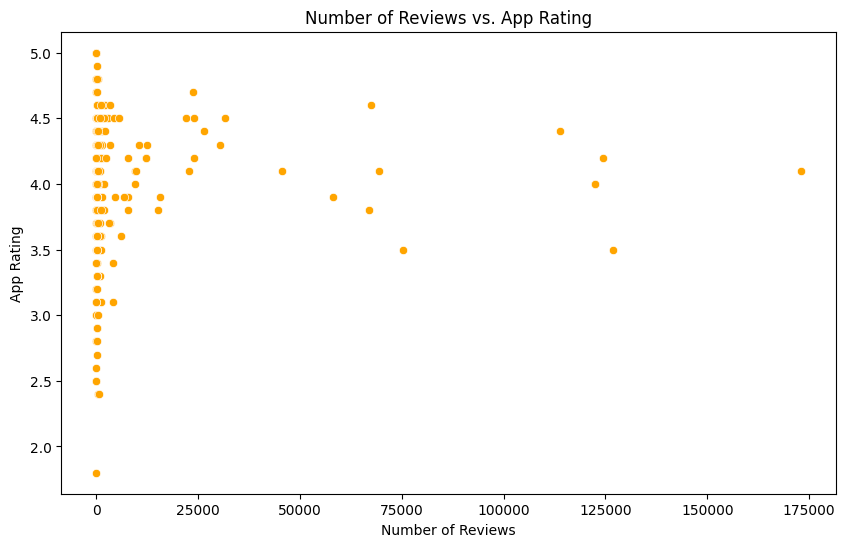

Correlation between Reviews and Rating: 0.035715067390426646


In [7]:
# Scatter plot: Reviews vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='Rating', color='orange')
plt.title('Number of Reviews vs. App Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('App Rating')
plt.show()

# Calculate correlation coefficient
correlation = df['Reviews'].corr(df['Rating'])
print("Correlation between Reviews and Rating:", correlation)
